In [1]:
import sys
sys.path.append("..")
import numpy as np

import copy
import corner 

from astropy.io import fits
from astropy.table import Table

from galpy.potential import MWPotential2014
from galpy.actionAngle import estimateDeltaStaeckel, actionAngleStaeckel, UnboundError

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams 
import datetime
%matplotlib inline

rcParams['font.size'] = 16
rcParams['lines.linewidth'] = 1.5
rcParams['axes.linewidth'] = 1.5
rcParams['ytick.major.width'] = 1.5
rcParams['xtick.major.width'] = 1.5
rcParams['image.cmap'] = 'magma'
rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 300
rcParams['savefig.format'] = 'png'

cmap = copy.copy(plt.cm.get_cmap(rcParams['image.cmap']))
cmap.set_bad((0,0,0))
%config InlineBackend.figure_format = 'retina'


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
machine = 'mac'
#machine = 'magny'
machine = 'virgo'

if machine == 'magny':
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
    filedir = "/home/extmilan/masterthesis/files/"
    plotdir = "/home/extmilan/masterthesis/plots/"
elif machine == 'mac': 
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
    filedir = "/Users/smilanov/Documents/masterthesis/auriga_files/files/"
    plotdir = "/Users/smilanov/Documents/masterthesis/auriga_files/plots/"
elif machine == 'virgo': 
    basedir = "/virgo/simulations/Auriga/level4_MHD/"
    filedir = "/u/milas/masterthesis/masterproject/files/"
    plotdir = "/u/milas/masterthesis/masterproject/plots/"
   

In [7]:
jR_kpckms, lz_kpckms, jz_kpckms = np.loadtxt(filedir + 'Gaia/Gaia_Enc_actions_MW14.txt')
data_cut = (jR_kpckms<=3000. )* (jz_kpckms<= 500)

jR_enc, lz_enc, jz_enc = jR_kpckms[data_cut], lz_kpckms[data_cut], jz_kpckms[data_cut]
jR_kpckms_halo, lz_kpckms_halo, jz_kpckms_halo = np.loadtxt(filedir + 'Gaia/Gaia_halo_actions_MW14.txt')
jR_kpckms_disk, lz_kpckms_disk, jz_kpckms_disk = np.loadtxt(filedir + 'Gaia/Gaia_disk_actions_MW14.txt')

In [9]:
data_enc_cut = (jR_enc<=3000. )* (jz_enc<= 500)
data_enc = np.vstack([jR_enc[data_enc_cut], lz_enc[data_enc_cut], jz_enc[data_enc_cut]])

data_halo_cut = (jR_kpckms_halo<=3000. )* (jz_kpckms_halo<= 500)
data_halo = np.vstack([jR_kpckms_halo[data_halo_cut], lz_kpckms_halo[data_halo_cut], jz_kpckms_halo[data_halo_cut]])

data_disk_cut = (jR_kpckms_disk<=3000. )* (jz_kpckms_disk<= 500)
data_disk = np.vstack([jR_kpckms_disk[data_disk_cut], lz_kpckms_disk[data_disk_cut], jz_kpckms_disk[data_disk_cut]])


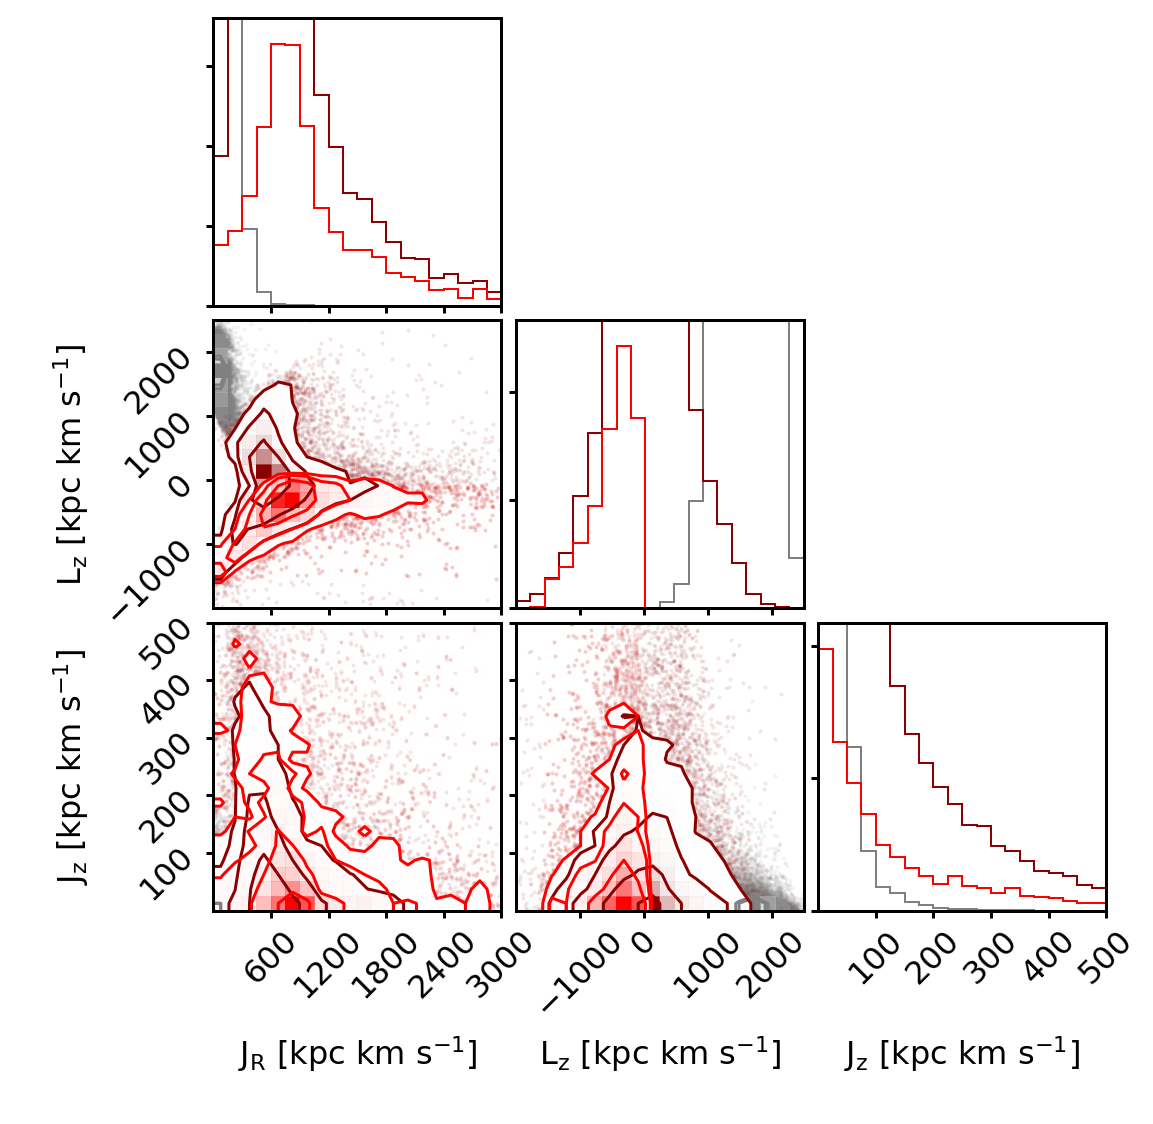

In [10]:
jrange = ((0, 3000), (-2000, 2500), (0,500))
labels = ['\nJ$_\mathrm{R}$ [kpc km s$^{-1}$]\n', '\nL$_\mathrm{z}$ [kpc km s$^{-1}$]\n', '\nJ$_\mathrm{z}$ [kpc km s$^{-1}$]\n']
fig = corner.corner(data_disk.transpose(),  labels = labels,range=jrange,plot_contours = 1, color = 'grey')
fig.savefig(plotdir + 'Gaia/Gaia_all_actions_MW14_talk1.png', dpi = 300, bbox_inches='tight')
corner.corner(data_halo.transpose(), labels = labels, range=jrange, plot_contours = 1, color = 'darkred', fig = fig)
fig.savefig(plotdir + 'Gaia/Gaia_all_actions_MW14_talk2.png', dpi = 300, bbox_inches='tight')
corner.corner(data_enc.transpose(),  range=jrange,plot_contours = 1, color = 'red', fig = fig)
fig.savefig(plotdir + 'Gaia/Gaia_all_actions_MW14_talk3.png', dpi = 300, bbox_inches='tight')

plt.show()